# Initial Data Exploration

Goal: gain a basic understanding of what the data looks like to inform analysis approach

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset FD001 (training)

Open data and remove excess columns that are imported

In [19]:
raw_data = pd.read_csv("../data/external/train_FD001.txt",sep=' ',header=None)
headers = ['unit number','time, in cycles','operational setting 1', 'operational setting 2', 'operational setting 3']
for i in range(1,24):
    headers.append('sensor measurement ' + str(i))
raw_data.set_axis(headers,axis=1,inplace = True)
raw_data = raw_data.drop('sensor measurement 22',axis=1)
raw_data = raw_data.drop('sensor measurement 23',axis=1)

Split the data set into groups for each time series and retrieve the first to visualize. Note: each dataset is ending at failure.

In [26]:
gd = raw_data.groupby('unit number') # grouped data
unit_1 = gd.get_group(1)

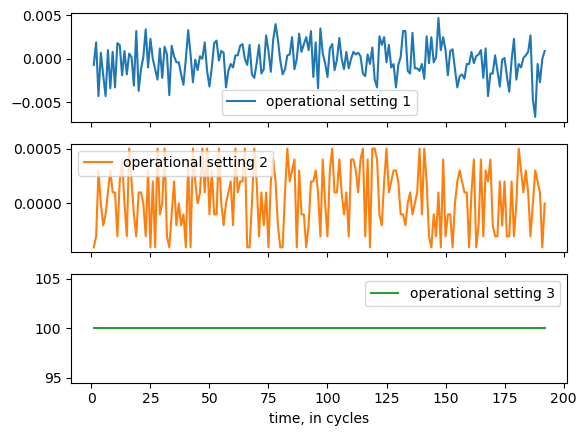

In [27]:
plot_cols = ['operational setting 1', 'operational setting 2','operational setting 3']
plot_features = unit_1[plot_cols]
plot_features.index = unit_1['time, in cycles']
_ = plot_features.plot(subplots=True)

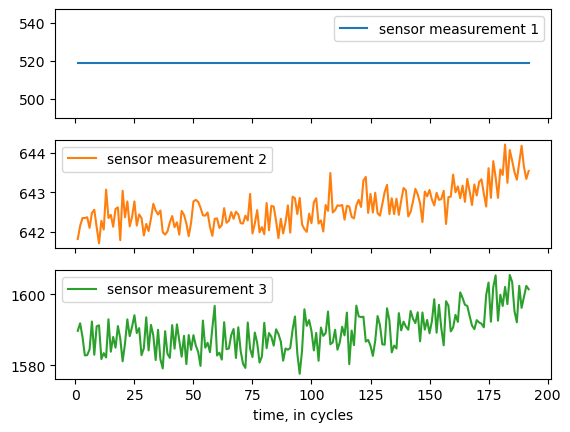

In [28]:
plot_cols = ['sensor measurement 1','sensor measurement 2','sensor measurement 3']
plot_features = unit_1[plot_cols]
plot_features.index = unit_1['time, in cycles']
_ = plot_features.plot(subplots = True)

## Inspect and cleanup the dataset

Look through statistics of the data to clean up any errors/NaNs - looking at one unit to start and then all units

In [29]:
unit_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit number,192.0,1.000000,0.000000e+00,1.0000,1.000000,1.00000,1.000000,1.0000
"time, in cycles",192.0,96.500000,5.556978e+01,1.0000,48.750000,96.50000,144.250000,192.0000
operational setting 1,192.0,-0.000189,1.953446e-03,-0.0067,-0.001425,0.00000,0.001000,0.0047
operational setting 2,192.0,0.000048,2.822825e-04,-0.0004,-0.000200,0.00010,0.000300,0.0005
operational setting 3,192.0,100.000000,0.000000e+00,100.0000,100.000000,100.00000,100.000000,100.0000
sensor measurement 1,192.0,518.670000,1.367809e-12,518.6700,518.670000,518.67000,518.670000,518.6700
sensor measurement 2,192.0,642.621042,4.867952e-01,641.7100,642.272500,642.54000,642.882500,644.2100
sensor measurement 3,192.0,1589.485521,5.759776e+00,1577.6000,1584.727500,1589.61500,1592.715000,1605.4400
sensor measurement 4,192.0,1407.262135,8.565610e+00,1393.5800,1400.985000,1404.48000,1412.305000,1432.5200
sensor measurement 5,192.0,14.620000,6.589703e-14,14.6200,14.620000,14.62000,14.620000,14.6200


In [30]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
"time, in cycles",20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor measurement 1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor measurement 2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor measurement 3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor measurement 4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor measurement 5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


Everything looks reasonable with no eroneous measurements so moving on to normalizing the data.

In [31]:
train_mean = raw_data.mean()
train_std = raw_data.std()

norm_data = (raw_data-train_mean) / train_std

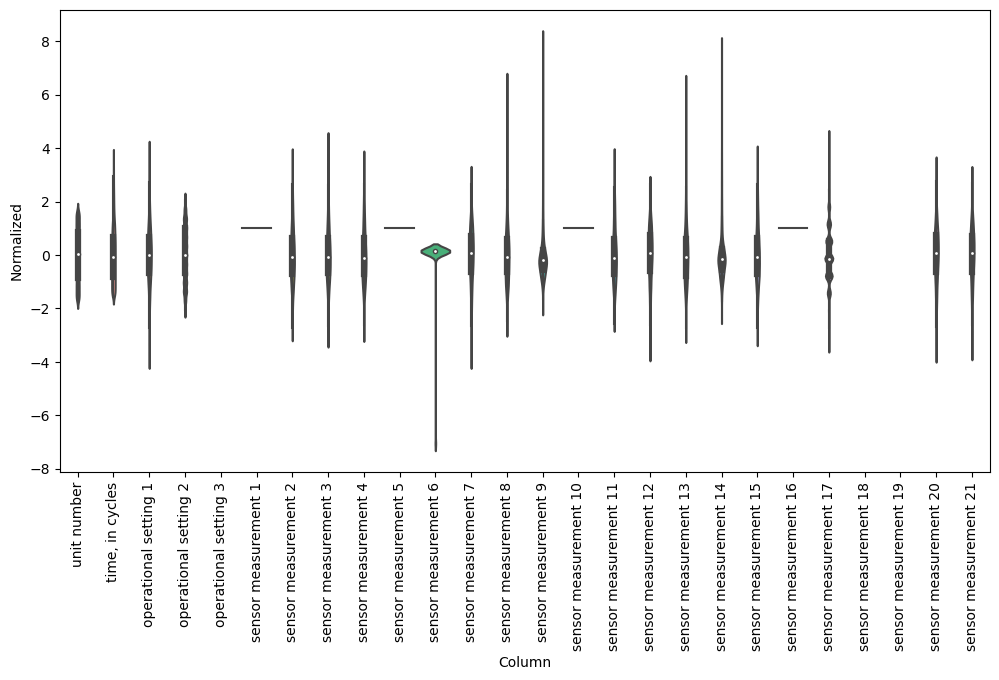

In [35]:
plt.figure(figsize = (12,6))
norm_data = norm_data.melt(var_name='Column', value_name='Normalized')
ax = sns.violinplot(x='Column', y='Normalized',data=norm_data)
_ = ax.set_xticklabels(raw_data.keys(),rotation=90)